In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
%matplotlib inline
np.set_printoptions(precision=4)

### Carga dos dados

In [3]:
df_segmentos = pd.read_json("./datasets/extracao-segmentos.json")

### Estrutura da fonte de dados

In [7]:
df_segmentos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613734 entries, 0 to 613733
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   pk_ato           613734 non-null  int64         
 1   data_publicacao  613734 non-null  datetime64[ns]
 2   tipo_ato         613734 non-null  object        
 3   pk_segmento      613734 non-null  int64         
 4   tipo_segmento    613734 non-null  object        
 5   texto_segmento   613734 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 28.1+ MB


In [6]:
# Conversão do atributo data_publicacao para formato de data
df_segmentos['data_publicacao'] = pd.to_datetime(df_segmentos['data_publicacao'])

### Análise da quantidade de atos por tipo de ato

In [80]:
qtd_atos_por_tipo = df_segmentos[['tipo_ato', 'pk_ato']].groupby('tipo_ato')['pk_ato'].nunique()
df_qtd_atos_por_tipo = pd.DataFrame(qtd_atos_por_tipo)
df_qtd_atos_por_tipo.columns = ['qtd_atos']
df_qtd_atos_por_tipo.reset_index(inplace=True)
df_qtd_atos_por_tipo.sort_values(by='qtd_atos', ascending=False, inplace=True, ignore_index=True)

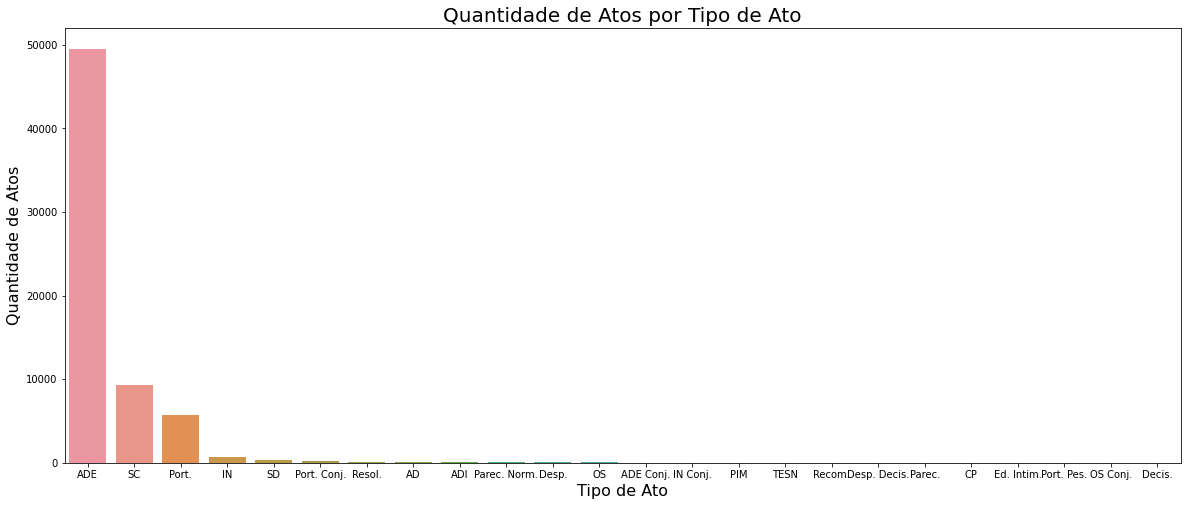

In [81]:
fig = plt.figure(figsize=(20,8))
ax = sns.barplot(x='tipo_ato', y='qtd_atos', data=df_qtd_atos_por_tipo)
ax.set_title('Quantidade de Atos por Tipo de Ato', fontsize=20)
ax.set_ylabel('Quantidade de Atos', fontsize=16)
ax.set_xlabel('Tipo de Ato', fontsize=16)
plt.show()

In [82]:
qtd_atos_ade = df_qtd_atos_por_tipo[df_qtd_atos_por_tipo['tipo_ato']=='ADE']['qtd_atos']
print('Quantidade de atos do tipo ADE: {0:6d}'.format(qtd_atos_ade[0]))
total_atos = df_qtd_atos_por_tipo['qtd_atos'].sum()
print('Quantidade total de atos: {0:6d}'.format(total_atos))
perc_atos_ade = (qtd_atos_ade[0]/total_atos)*100
print('Percentual de atos do tipo ADE: {0:3.4f}%'.format(perc_atos_ade))

Quantidade de atos do tipo ADE:  49545
Quantidade total de atos:  66313
Percentual de atos do tipo ADE: 74.7139%


### Análise da quantidade de segmentos por tipo de ato

In [83]:
qtd_segmentos_por_tipo_ato = df_segmentos[['tipo_ato', 'pk_segmento']].groupby('tipo_ato')['pk_segmento'].nunique()
df_qtd_segmentos_por_tipo_ato = pd.DataFrame(qtd_segmentos_por_tipo_ato)
df_qtd_segmentos_por_tipo_ato.columns = ['qtd_segmentos']
df_qtd_segmentos_por_tipo_ato.reset_index(inplace=True)
df_qtd_segmentos_por_tipo_ato.sort_values(by='qtd_segmentos', ascending=False, inplace=True, ignore_index=True)

In [90]:
# Normalizando a quantidade de segmentos por tipo a partir da quantidade de atos
df_qtd_atos_segmentos = pd.merge(df_qtd_atos_por_tipo, df_qtd_segmentos_por_tipo_ato, on='tipo_ato')
df_qtd_atos_segmentos['qtd_segmentos_norm'] = df_qtd_atos_segmentos['qtd_segmentos']/df_qtd_atos_segmentos['qtd_atos']
df_qtd_atos_segmentos.sort_values(by='qtd_segmentos_norm', ascending=False, inplace=True, ignore_index=True)

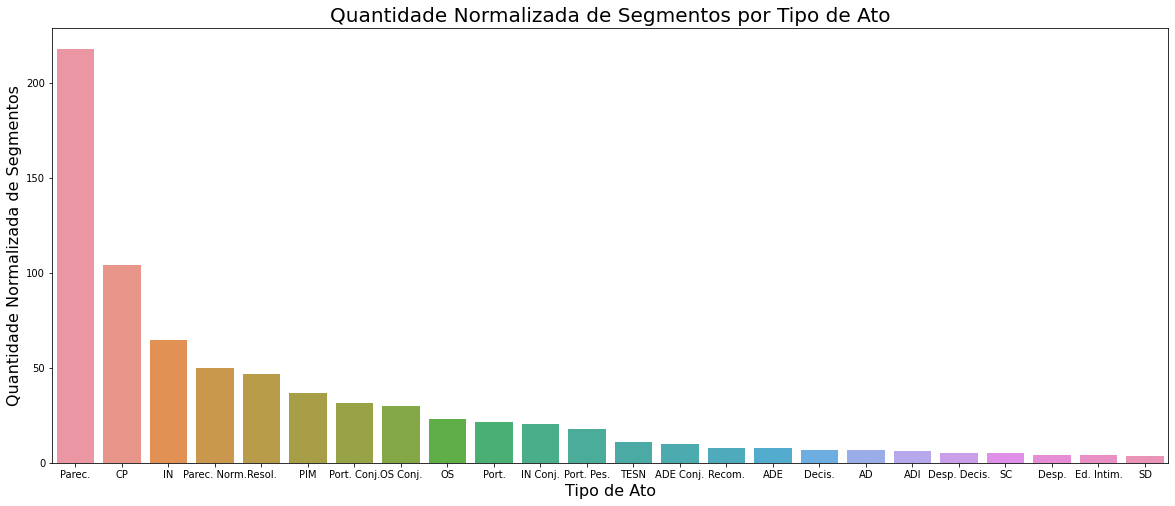

In [91]:
fig = plt.figure(figsize=(20,8))
ax = sns.barplot(x='tipo_ato', y='qtd_segmentos_norm', data=df_qtd_atos_segmentos)
ax.set_title('Quantidade Normalizada de Segmentos por Tipo de Ato', fontsize=20)
ax.set_ylabel('Quantidade Normalizada de Segmentos', fontsize=16)
ax.set_xlabel('Tipo de Ato', fontsize=16)
plt.show()

### Análise da quantidade de segmentos por tipo de segmento

In [10]:
qtd_segmentos_por_tipo = df_segmentos[['pk_segmento', 'tipo_segmento']].groupby('tipo_segmento').count().sort_values("pk_segmento", ascending=False)
qtd_segmentos_por_tipo.columns = ['quantidade_segmentos']
qtd_segmentos_por_tipo.reset_index(inplace=True)

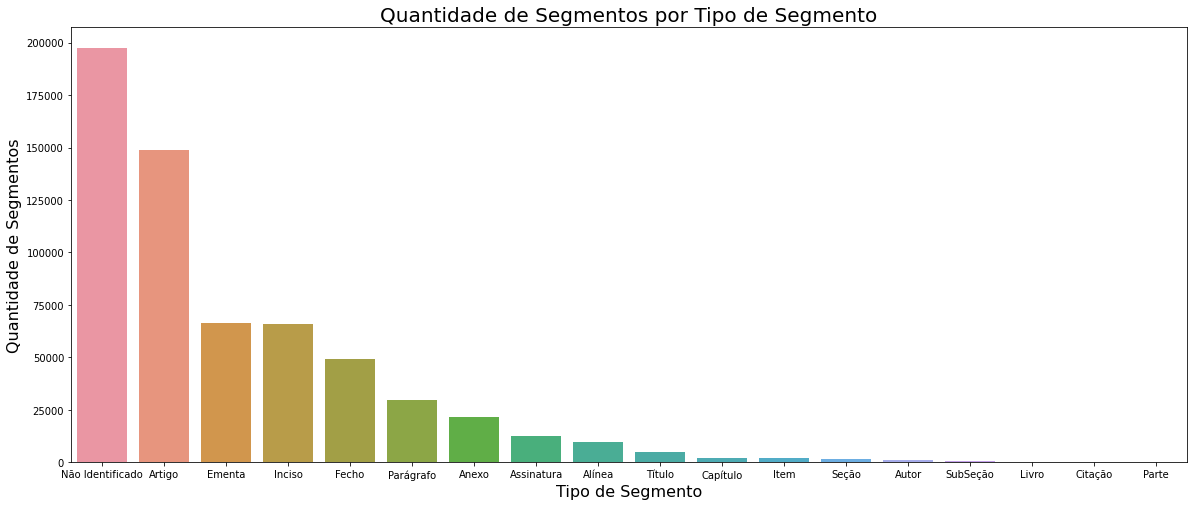

In [11]:
fig = plt.figure(figsize=(20,8))
ax = sns.barplot(x='tipo_segmento', y='quantidade_segmentos', data=qtd_segmentos_por_tipo)
ax.set_title('Quantidade de Segmentos por Tipo de Segmento', fontsize=20)
ax.set_ylabel('Quantidade de Segmentos', fontsize=16)
ax.set_xlabel('Tipo de Segmento', fontsize=16)
plt.show()